<a href="https://colab.research.google.com/github/NafisFuadTanvir/Machine-learning-works/blob/main/backpropagationWithMinstdatset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [13]:
import numpy as np
import pandas as pd
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt


In [14]:
mnist = fetch_openml('mnist_784')
index_number= np.random.permutation(70000)
X=mnist.data.loc[index_number]
y=mnist.target.loc[index_number]

/usr/local/lib/python3.10/dist-packages/sklearn/datasets/_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


In [15]:
X_train , X_test , y_train , y_test = train_test_split(X, y,test_size =20, random_state =4)
y_train = pd.get_dummies(y_train).values
y_test = pd.get_dummies(y_test).values
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(69980, 784)
(20, 784)
(69980, 10)
(20, 10)


In [16]:
learning_rate = 0.01
iterations = 100
N = y_train.size
input_size = 784
hidden_size = 20
output_size = 10
results = pd.DataFrame(columns=["mse", "accuracy"])

In [17]:
np.random.seed (10)
W1 = np.random.normal(scale =0.5, size=(input_size , hidden_size))
W2 = np.random.normal(scale =0.5, size=( hidden_size , output_size))

In [18]:
def sigmoid(x):
  return 1 / (1 + np.exp(-x))

def mean_squared_error(y_pred , y_true):
  return ((y_pred - y_true)**2).sum() / (2* y_pred.size)

def accuracy(y_pred , y_true):
  acc = y_pred.argmax(axis =1) == y_true.argmax(axis =1)
  return acc.mean()

In [19]:
for itr in range(iterations):
  Z1 = np.dot(X_train , W1)
  A1 = sigmoid(Z1)

  Z2 = np.dot(A1, W2)
  A2 = sigmoid(Z2)

  mse = mean_squared_error(A2, y_train)
  acc = accuracy(A2, y_train)

  results = results.append({"mse":mse , "accuracy":acc}, ignore_index=True)

  E1 = A2 - y_train
  dW1 = E1 * A2 * (1 - A2)

  E2 = np.dot(dW1 , W2.T)
  dW2 = E2 * A1 * (1 - A1)

  W2_update = np.dot(A1.T, dW1) / N
  W1_update = np.dot(X_train.T, dW2) / N
  W2 = W2 - learning_rate * W2_update
  W1 = W1 - learning_rate * W1_update

<ipython-input-18-a9012897ca7f>:2: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))
<ipython-input-19-5461169e1954>:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append({"mse":mse , "accuracy":acc}, ignore_index=True)
<ipython-input-18-a9012897ca7f>:2: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))
<ipython-input-19-5461169e1954>:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append({"mse":mse , "accuracy":acc}, ignore_index=True)
<ipython-input-18-a9012897ca7f>:2: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))
<ipython-input-19-5461169e1954>:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = re

<Axes: title={'center': 'Mean Squared Error'}>

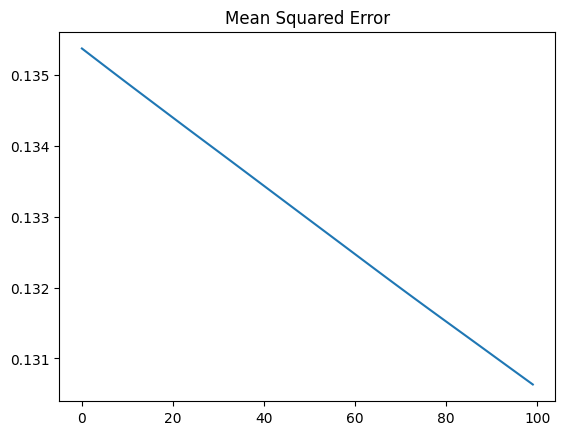

In [20]:
results.mse.plot(title="Mean Squared Error")

<Axes: title={'center': 'Accuracy'}>

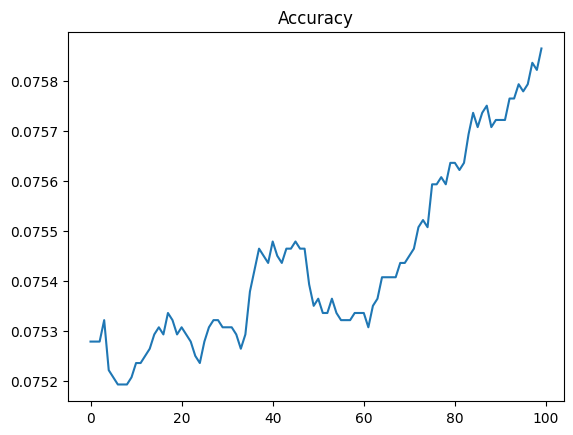

In [21]:
results.accuracy.plot(title="Accuracy")

In [22]:
Z1 = np.dot(X_test , W1)
A1 = sigmoid(Z1)

Z2 = np.dot(A1, W2)
A2 = sigmoid(Z2)

acc = accuracy(A2, y_test)
print("Accuracy: {}".format(acc))

Accuracy: 0.05


<ipython-input-18-a9012897ca7f>:2: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))
